# Explore here

### Importing modules

In [66]:
import pandas as pd
import os
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data retrieval

In [8]:
#···········································#
# NOT RUN EACH TIME, DATA ARE ALREADY SAVED #
#···········································#
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
csv = requests.get(url)

if csv.status_code == 200:
    df = pd.read_csv(StringIO(csv.content.decode('utf-8')))
    df.to_csv('../data/raw/AB_NYC_2019.csv',index=False)
    print('Raw data saved')
else:
    print('Error: ', csv.status_code)

Raw data saved


In [67]:
raw_df = pd.read_csv('../data/raw/AB_NYC_2019.csv')
raw_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Objective
To study which type of accommodation receives the most reviews, understanding that a higher number of reviews implies that the accommodation has been rented more times. Based on this analysis, we can determine which type of accommodation is more profitable.

Therefore, our target will be 'number_of_reviews'

## 1. Exploration and superficial cleaning

### 1.1 Problem dimensions

In [68]:
raw_df.shape

(48895, 16)

We have 16 columns or variables in our dataframe and 48895 records or rows

### 1.2 Null values

In [70]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [71]:
raw_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 1.3 Drop duplicates

In [91]:
my_df = raw_df.drop_duplicates(raw_df.columns.difference(["host_id"]))
if len (raw_df) == len(my_df):
    print('There is no duplicates in raw data.')
else:
    print('Dropped duplicates from raw_df. Use my_df instead.')

There is no duplicates in raw data.


### 1.4 Drop unuseful information

We don´t need calculared_host_listing_count, last_review, name, host_name, latitude and longitude variables, so we drop these columns

In [92]:
my_df.drop(["calculated_host_listings_count", "last_review", "name", "host_name", "latitude","longitude","reviews_per_month"], axis = 1, inplace = True)
my_df.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0


## 2. Univariate analysis

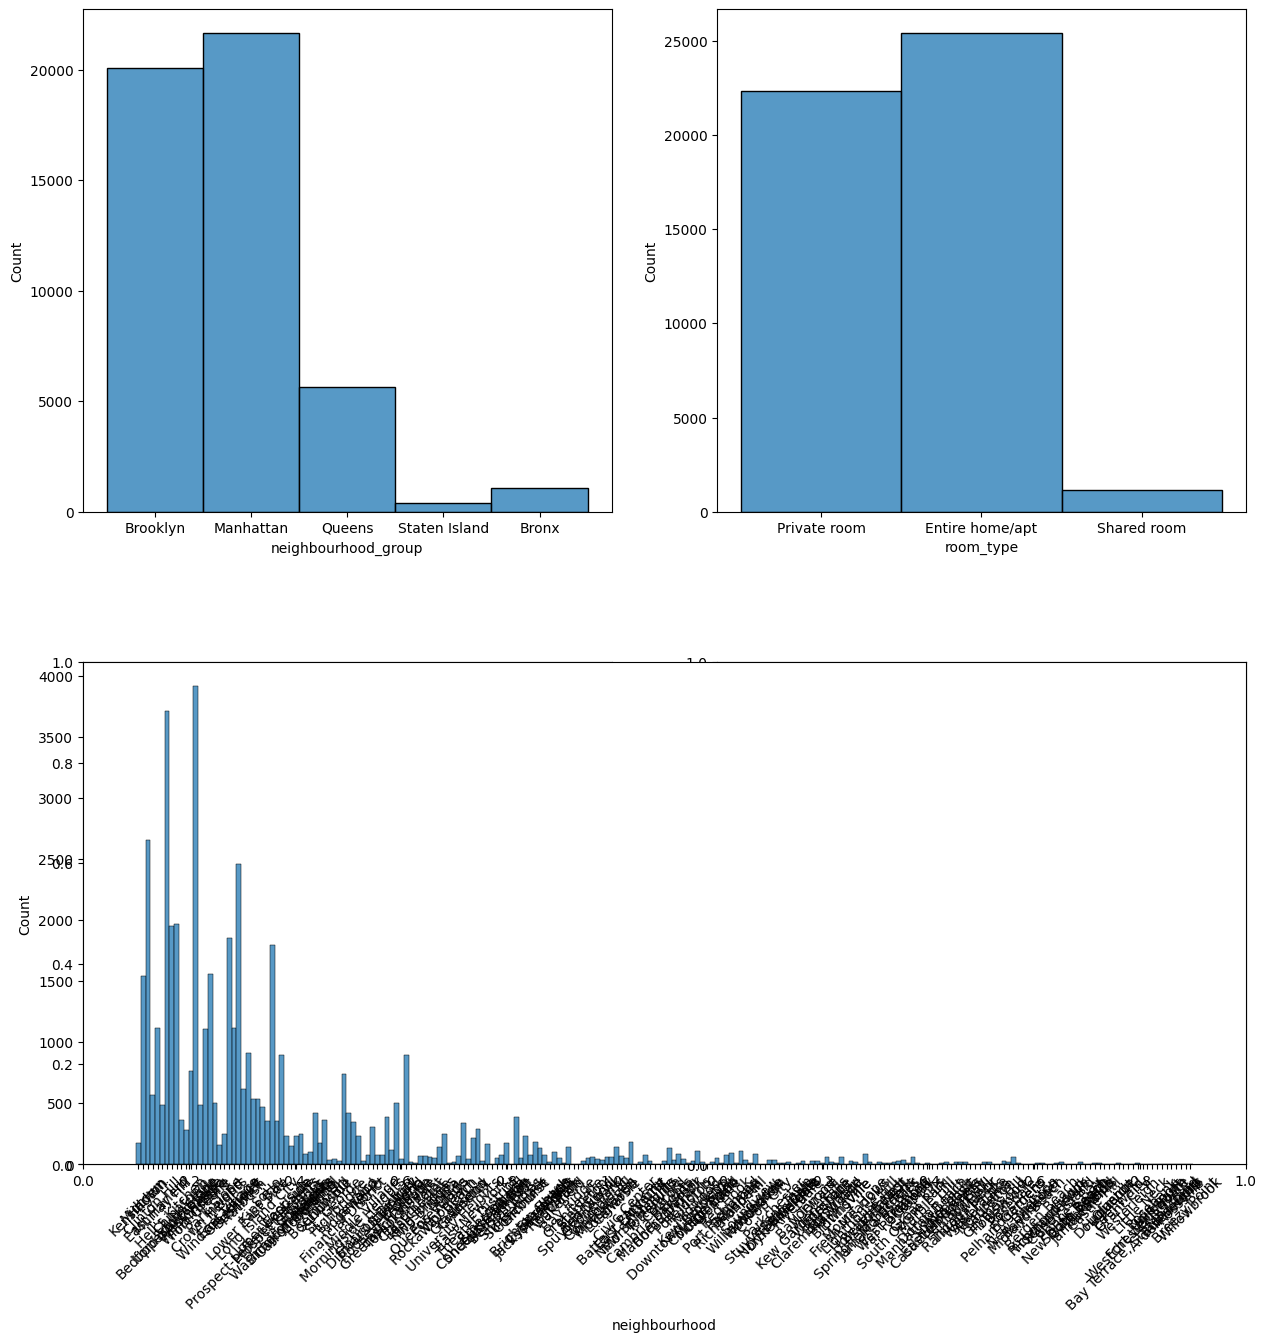

In [93]:
fig, axis = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(my_df, x="neighbourhood_group", ax=axis[0, 0])
sns.histplot(my_df, x="room_type", ax=axis[0, 1])

ax_neighbourhood = fig.add_subplot(212)
sns.histplot(my_df, x="neighbourhood", ax=ax_neighbourhood)
for tick in ax_neighbourhood.get_xticklabels():
    tick.set_rotation(45)
plt.subplots_adjust(hspace=0.3)


There is much more availability of entire homes or private rooms for rent. The majority of hostings are offered in Manhattan and Brooklyn.

<Axes: xlabel='number_of_reviews'>

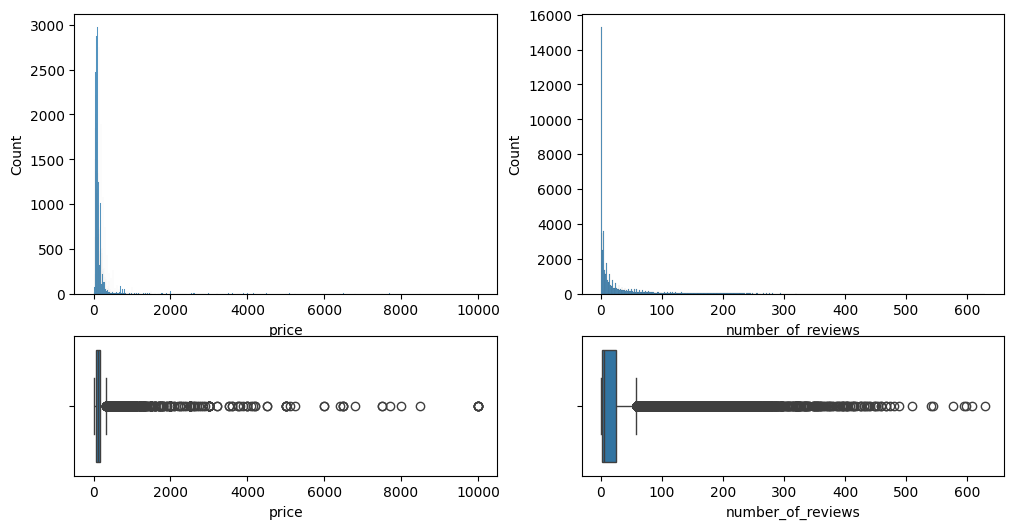

In [94]:
fig, axis = plt.subplots(2, 2, figsize = (12, 6),gridspec_kw={'height_ratios': [8, 4]})

sns.histplot(my_df, x = "price", ax = axis[0,0])
sns.boxplot(my_df, x = "price", ax = axis[1,0])
sns.histplot(my_df, x = "number_of_reviews", ax = axis[0,1])
sns.boxplot(my_df, x = "number_of_reviews", ax = axis[1,1])



There is a wide range of prices and number of reviews.

### 3. Multivariate analysis
Let's make a comparison of prices district by district.

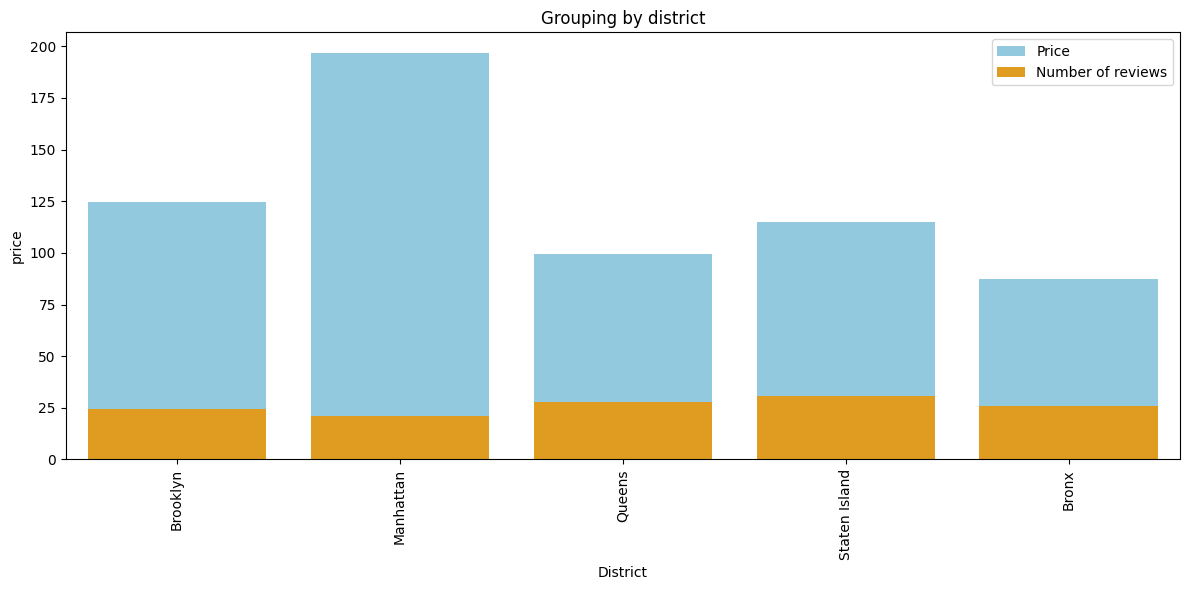

In [95]:
plt.figure(figsize=(12, 6))
sns.barplot(data=my_df, x='neighbourhood_group', y='price', estimator=np.mean, errorbar=None, color='skyblue', label='Price')
sns.barplot(data=my_df, x='neighbourhood_group', y='number_of_reviews', estimator=np.mean, errorbar=None, color='orange', label='Number of reviews')
plt.xticks(rotation=90)
plt.xlabel('District')
plt.title('Grouping by district')
plt.legend()
plt.tight_layout()

In Manhattan, prices are the highest and lodgings have the lowest number of reviews. It can be understood that, because they are the most expensive, they are rented less frequently and therefore have fewer reviews.

In [96]:
corr_df = my_df.copy()

<Axes: >

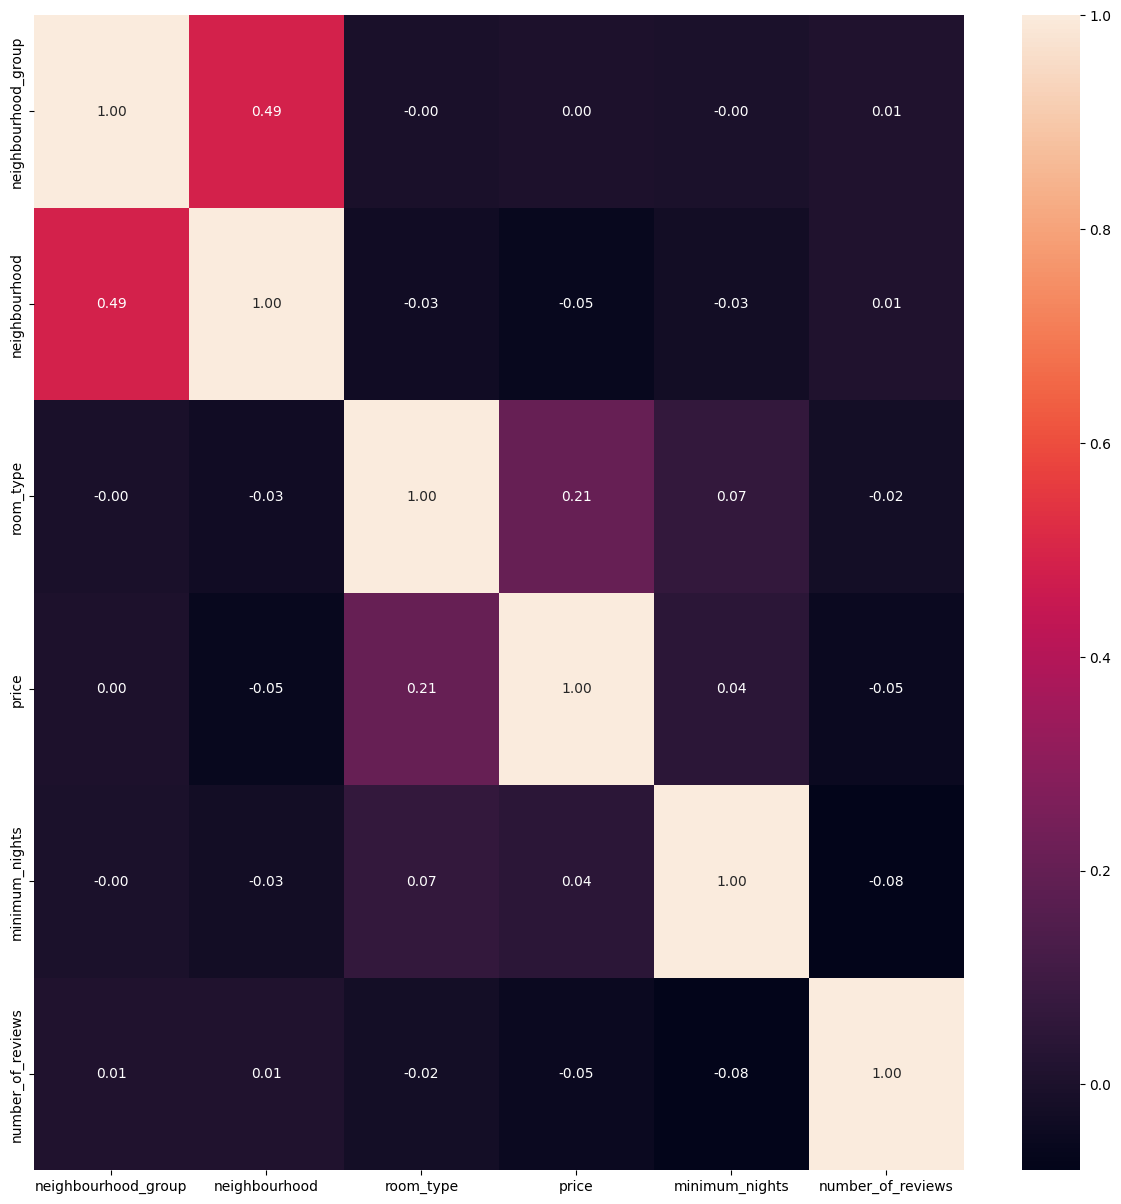

In [97]:

corr_df.drop(["availability_365","host_id",'id'], axis = 1, inplace = True)
corr_df["neighbourhood"] = pd.factorize(corr_df["neighbourhood"])[0]
corr_df["neighbourhood_group"] = pd.factorize(corr_df["neighbourhood_group"])[0]
corr_df["room_type"] = pd.factorize(corr_df["room_type"])[0]

fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(corr_df.corr(), annot = True, fmt = ".2f")


The most related variables are the neighborhood with the district (this is trivial) and the price with the type of room

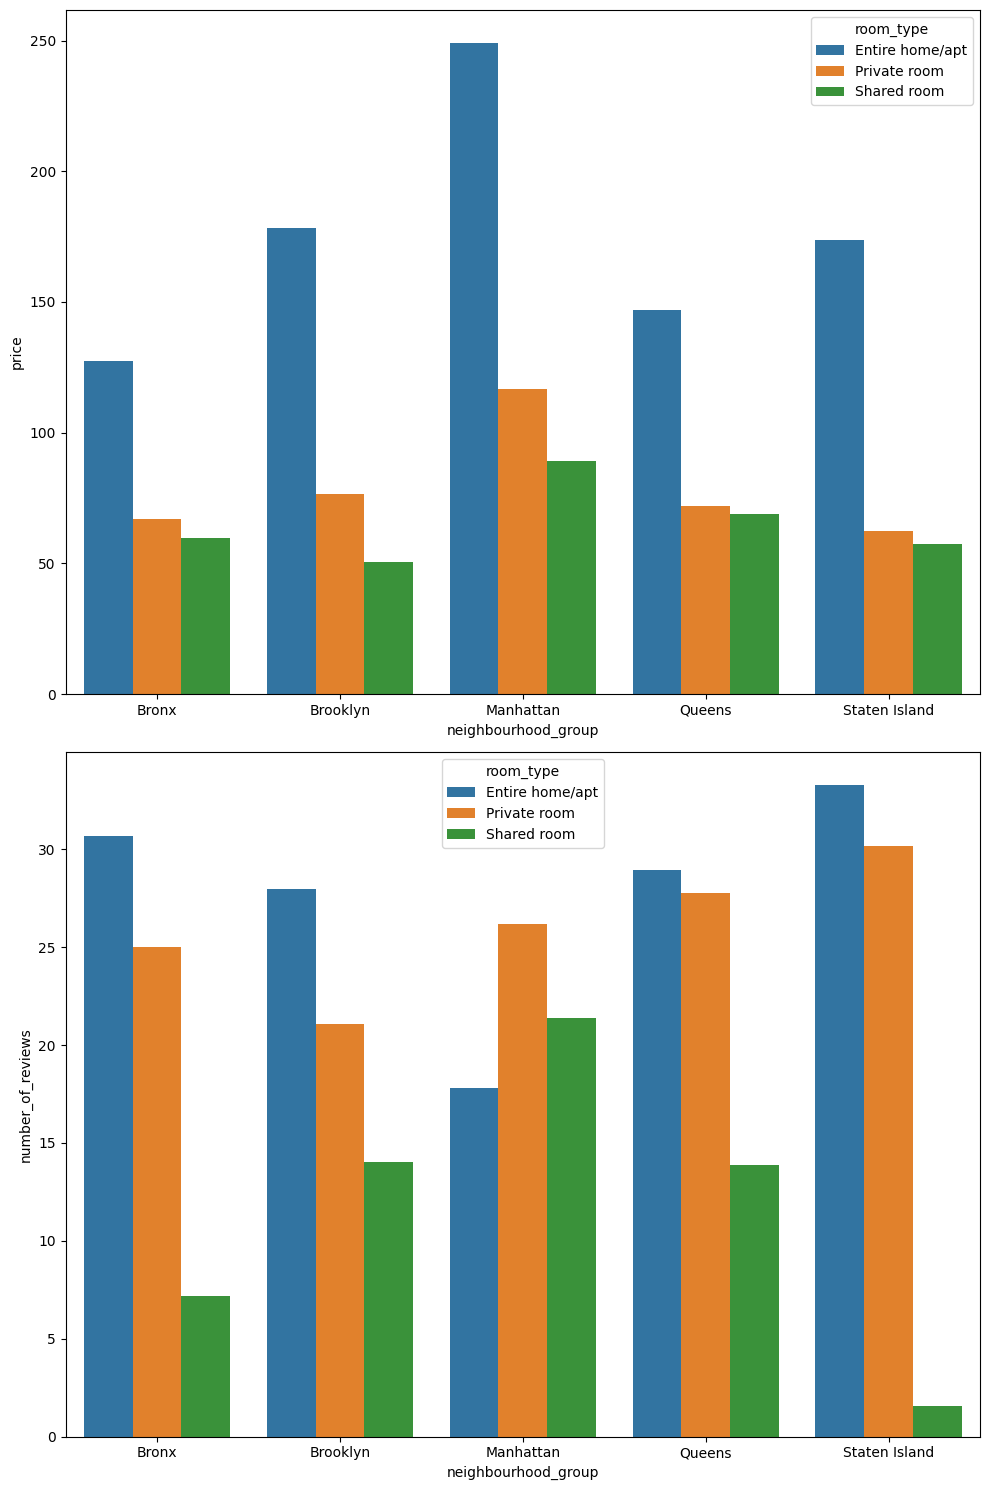

In [102]:
mean_prices = my_df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
mean_reviews = my_df.groupby(['neighbourhood_group', 'room_type'])['number_of_reviews'].mean().reset_index()

fig, axis = plt.subplots(2, 1, figsize=(10, 15))
sns.barplot(data=mean_prices, x='neighbourhood_group', y='price', hue='room_type',ax = axis[0])
sns.barplot(data=mean_reviews, x='neighbourhood_group', y='number_of_reviews', hue='room_type',ax = axis[1])

plt.tight_layout()

In all districts, the most expensive type of room is the entire home, and the cheapest is the shared room. The most expensive district for all types of rooms is Manhattan. In all districts except Manhattan, the type of room that receives the most reviews is the entire home. The district that receives the most reviews for entire homes or private rooms is Staten Island. The district that receives the most reviews for shared rooms is Manhattan.
